# <center>Lab Assignment 3: Hopfield networks</center>

In [1]:
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt

### Implement the network class

In [2]:
class HopfieldNetwork:
    def __init__(self):
        self.W = None

    def train(self, X: np.ndarray):
        M, N = len(X), len(X[0])
        self.W = (1 / N) * X.dot(X.T)
        np.fill_diagonal(self.W, 0)

    def print_W(self):
        for i in range(self.W.shape[0]):
            for j in range(self.W.shape[1]):
                print("%.1f  \t" % (self.W[i][j]),  end='')
            print()

    def update_async(self, p_start, mode: str = 'sequential', log: list = None):
        """
        Apply the update rule on the input pattern V to get the restored pattern
        which is an attractor in the network's storage
        :param mode:
        :param p_start: the start pattern
        :param log: energy log array to be filled
        :return: the restored pattern
        """
        V = np.copy(p_start)
        m = len(V)
        indices = [i for i in range(m)]
        iter = 1
        while True:
            if log is not None:
                e = self.energyOf(V)
                log.append(e)
            cnt = 0
            if mode == 'random':
                indices = np.random.permutation(indices)
            for i in indices:
                value_old = V[i]
                value_new = np.sign(self.W[:, i].dot(V))
                if value_new != value_old:
                    V[i] = value_new
                    cnt += 1
                # print(i, value_old, value_new, self.W[:, i].dot(V))

            if cnt == 0:
                # print("Converged in %s iterations" % iter)
                break
            if iter > 1e3:
                break
            iter += 1

        return V

    def update_sync(self, p_start, log: list = None):
        """
        Implementation of the little model
        :param p_start: the start pattern
        :param log: energy log array to be filled
        :return: the restored pattern
        """
        V = np.copy(p_start)
        iter = 1
        while True:
            if log is not None:
                e = self.energyOf(V)
                log.append(e)
            V_new = np.sign(self.W.dot(V))
            V = V_new
            diff = np.sum(np.abs(V - V_new))
            if diff == 0:
                break
            iter += 1

        return V

            
    def energyOf(self, x):
        """
        Compute the energy of the given state
        :param x: a n-by-1 array pattern which represents a state
        :return: a float value
        """
        # take it as a quadratic form
        return - x.dot(self.W).dot(x)

    @staticmethod
    def plot_energy(energy_log):
        for i in range(len(energy_log)):
            plt.scatter(i, energy_log[i])
        plt.plot(energy_log)
        plt.title("Energy changes")
        plt.show()

### Construct input patterns for training

In [3]:
x1 = [-1, -1, 1, -1, 1, -1, -1, 1]
x2 = [-1, -1, -1, -1, -1, 1, -1, -1]
x3 = [-1, 1, 1, -1, -1, 1, -1, 1]
X = np.array([x1, x2, x3]).T

### Train the network

In [4]:
model = HopfieldNetwork()
model.train(X)

# 3. Tasks and questions

## 3.1 Convergence and attractors

In [5]:
# 1. apply the update rule
x1d = np.array([1, -1, 1, -1, 1, -1, -1, 1])
x2d = np.array([1, 1, -1, -1, -1, 1, -1, -1])
x3d = np.array([1, 1, 1, -1, 1, 1, -1, 1])

In [6]:
rp1 = model.update_async(x1d)
print(rp1)
print((rp1 == x1).all())            

[-1 -1  1 -1  1 -1 -1  1]
True


In [7]:
rp2 = model.update_async(x2d)
print(rp2)
print((rp2 == x2).all())

[-1 -1 -1 -1 -1  1 -1 -1]
True


In [8]:
rp3 = model.update_async(x3d)
print(rp3)
print((rp3 == x3).all())

[-1  1  1 -1 -1  1 -1  1]
True


In [9]:
# 2. How many attractors are there in this network? Answer: 6
N = 8
k = 2 ** N
rp = np.ones([k, N])

for i in range(k):
    l = len(bin(i)) - 2
    for j in range(l):
        if bin(i)[j + 2] == '1':
            rp[i, N - l + j] = -1

n = 0

for i in range(k):
    A = rp[i]
    B = model.update_async(A)
    if (A == B).all():
        n += 1
        print('attractor', n, ':', A)

attractor 1 : [ 1.  1.  1.  1.  1. -1.  1.  1.]
attractor 2 : [ 1.  1. -1.  1. -1.  1.  1. -1.]
attractor 3 : [ 1. -1. -1.  1.  1. -1.  1. -1.]
attractor 4 : [-1.  1.  1. -1. -1.  1. -1.  1.]
attractor 5 : [-1. -1.  1. -1.  1. -1. -1.  1.]
attractor 6 : [-1. -1. -1. -1. -1.  1. -1. -1.]


In [10]:
# 3. What happens when making the start pattern more dissimilar to the stored ones?

In [11]:
x3ds = np.array([1, -1, -1, 1, 1, 1, -1, 1])
r3ds = model.update_async(x3ds)
print(r3ds)
print((r3ds == x3).all())

[-1  1  1 -1 -1  1 -1  1]
True


## 3.2 Sequential update

In [12]:
# read data stored in pict.dat

In [13]:
f = open("pict.dat")
raw_data = f.read().split(',')
length = len(raw_data)
N = int(length / 1024)
data = np.zeros((1024, N))
for i in range(length):
    raw_data[i] = float(raw_data[i])
data = np.array(raw_data).reshape((N, 1024))

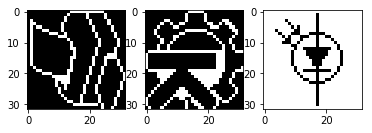

In [14]:
p1, p2, p3 = data[0], data[1], data[2]
plt.subplot(131)
plt.imshow(p1.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)

plt.subplot(132)
plt.imshow(p2.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)

plt.subplot(133)
plt.imshow(p3.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)

plt.show()

In [15]:
X = np.array([p1, p2, p3]).T
model = HopfieldNetwork()
model.train(X)

In [16]:
# 1. Check that the three patterns are stable

In [17]:
rp1 = model.update_async(p1)
print(rp1, (rp1 == p1).all())

rp2 = model.update_async(p2)
print(rp2, (rp2 == p2).all())

rp3 = model.update_async(p3)
print(rp3, (rp3 == p3).all())

[-1. -1. -1. ... -1. -1. -1.] True
[-1. -1. -1. ... -1. -1. -1.] True
[1. 1. 1. ... 1. 1. 1.] True


In [18]:
# 2. Try if the network can complete degraded patterns: p10 and p11

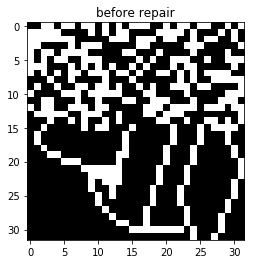

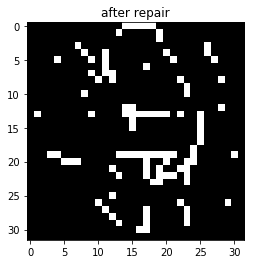

In [19]:
p10, p11 = data[9], data[10]
plt.imshow(p10.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
plt.title("before repair")
plt.show()
rp10 = model.update_async(p10)
plt.imshow(rp10.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
plt.title("after repair")
plt.show()

True


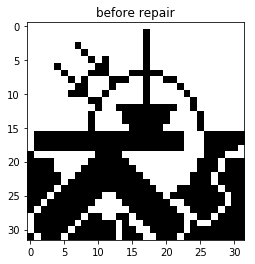

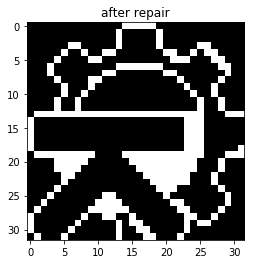

In [20]:
rp11 = model.update_async(p11)
print((rp11 == p2).all())

plt.imshow(p11.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
plt.title("before repair")
plt.show()

plt.imshow(rp11.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
plt.title("after repair")
plt.show()

In [21]:
# 3. Select units randomly, calculate the new states and repeat the process

## 3.3 Energy

In [22]:
# 1. What is the energy at the different attractors?

In [23]:
# find out all the undistored patterns
for i in range(11):
    p = data[i]
    rp = model.update_async(p)
    print(i + 1, (p == rp).all())

1 True
2 True
3 True
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False


In [24]:
for i in range(3):
    p = data[i]
    print(model.energyOf(p))

-490288.00000000006
-465114.66666666674
-498090.6666666668


In [25]:
# 2. What is the energy of the distorted patterns?

In [26]:
for i in range(3, 11):
    p = data[i]
    print(model.energyOf(p))

-244900.00000000003
-178480.0
-232208.0
-233038.6666666667
-57530.66666666667
-90286.66666666667
-140964.0
-58197.333333333314


In [27]:
# 3. Follow the energy changes during sequential update

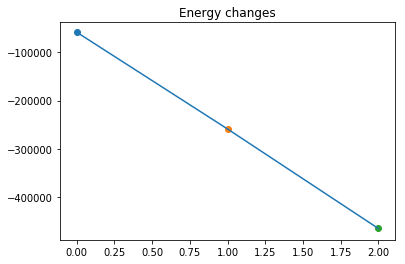

In [28]:
energy_log = []
model.update_async(data[10], log=energy_log)
model.plot_energy(energy_log)

In [29]:
# 4. Generate a random weight matrix and iterate an arbitrary random state

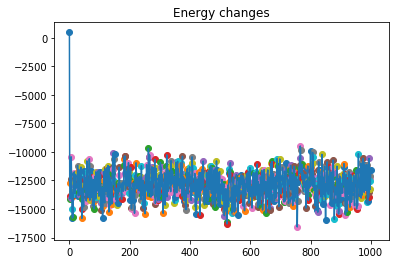

In [30]:
np.random.seed(0)
W = np.random.normal(0, 1, (1024, 1024))
np.random.seed(1)
p_start = np.sign(np.random.normal(0, 1, 1024))
model.W = W
energy_log = []
rp = model.update_async(p_start, log=energy_log)
model.plot_energy(energy_log)

In [31]:
# 5. Make thw weight matrix symmetrix and find out what will happen and why that happens.

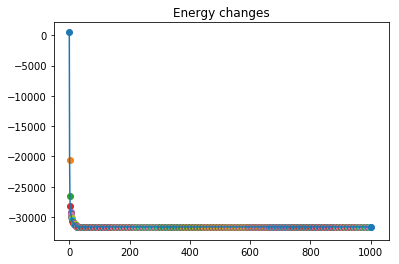

In [32]:
W = 0.5 * (W + W.T)
model.W = W
energy_log = []
rp = model.update_async(p_start, log=energy_log)
model.plot_energy(energy_log)

## 3.4 Distortion Resistance

In [33]:
# 1. Add noise to p1, p2, p3 and see how much noise can be removed.

In [34]:
def add_noise(arr: np.ndarray, ratio: float):
    """
    Randomly flip a selected number of units
    :param arr: the array to add noise
    :param ratio: the ratio of noise
    :return: the array with noise
    """
    p = np.copy(arr)
    n = len(p)
    permutation = [i for i in range(n)]
    m = int(n * ratio)
    np.random.seed(2)
    indices = np.random.choice(permutation, m)
    for index in indices:
        p[index] = - p[index]

    return p

In [35]:
ratio = np.linspace(0.2, 1, 5)

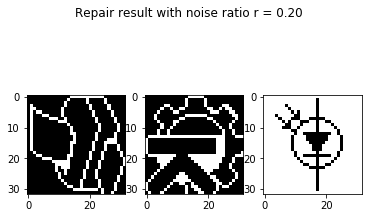

Repair degree:  1.0 1.0 1.0


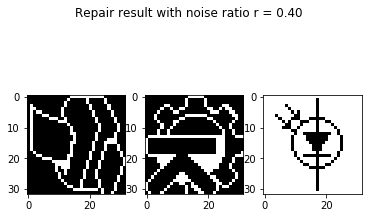

Repair degree:  1.0 1.0 1.0


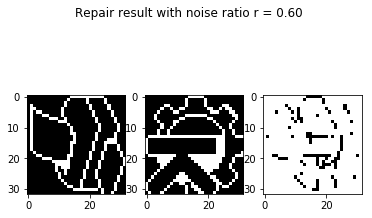

Repair degree:  1.0 1.0 0.763671875


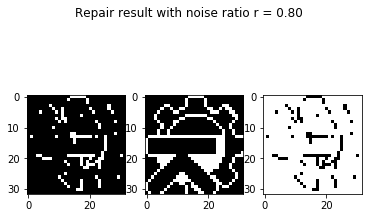

Repair degree:  0.736328125 1.0 0.763671875


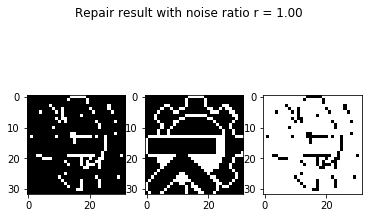

Repair degree:  0.736328125 1.0 0.763671875


In [36]:
model.train(X)
for r in ratio:
    p1_noise = add_noise(p1, r)
    p2_noise = add_noise(p2, r)
    p3_noise = add_noise(p3, r)
    rp1 = model.update_sync(p1_noise)
    rp2 = model.update_sync(p2_noise)
    rp3 = model.update_sync(p3_noise)

    fig = plt.figure()
    fig.suptitle("Repair result with noise ratio r = %.2f" % r)
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    ax1.imshow(rp1.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
    ax2.imshow(rp2.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
    ax3.imshow(rp3.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
    plt.show()

    degree1 = 1 - np.sum(np.abs(p1 - rp1)) / 1024
    degree2 = 1 - np.sum(np.abs(p2 - rp2)) / 1024
    degree3 = 1 - np.sum(np.abs(p3 - rp3)) / 1024

    print("Repair degree: ", degree1, degree2, degree3)

In [37]:
# 2. Find out the difference between the attractors with regard to noise tolerance

In [38]:
# 3. Find out if the network always converge to the right attractor